# Soluciones Computacionales a Problemas de Ingeniería IST4360




*   Estudiantes: Kenny Zhu Ye, Samir Mercado
*   Código: 200164380, 200161553


In [25]:
import numpy as np
import sympy as sp
from sympy.printing import latex
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt

## Ejercicio 1
Haciendo uso de diferencias divididas construya los polinomios interpoladores de primer, segundo y tercer grado para los puntos dados. Para el valor especificado aproxime el resultado usando cada uno de los polinomios.


*   $f(8.4)$, si $f(8.1)=17.56492$, $f(8.3)=17.56492$, $f(8.6)=18.50515$ y $f(8.7)=18.82091$
*   $f(0.9)$, si $f(0.6)=-0.17694460$, $f(0.7)=0.01375227$, $f(0.8)=0.22363362$ y $f(1.0)=0.658009197$


In [26]:
# Función para calcular la matriz de diferencias divididas
def diferencias_divididas(coordenadas_x, coordenadas_y):
    # Número de puntos de datos
    num_puntos = len(coordenadas_x)
    # Inicializar la matriz de diferencias divididas con ceros
    matriz_diferencias = np.zeros([num_puntos, num_puntos])
    # Establecer la primera columna de la matriz como las coordenadas_y
    matriz_diferencias[:, 0] = coordenadas_y

    # Iterar sobre cada orden de diferencias divididas
    for orden in range(1, num_puntos):
        # Calcular las diferencias divididas para el orden actual
        for i in range(num_puntos - orden):
            matriz_diferencias[i][orden] = (matriz_diferencias[i + 1][orden - 1] - matriz_diferencias[i][orden - 1]) / (coordenadas_x[i + orden] - coordenadas_x[i])

    # Devolver la matriz de diferencias divididas
    return matriz_diferencias


# Función para obtener el polinomio interpolador de Newton
def interpolador_newton(coordenadas_x, matriz_diferencias, max_orden):
    # Definir la variable simbólica x
    variable_x = sp.symbols('x')
    # Inicializar el polinomio con el primer término de la matriz de diferencias divididas
    polinomio = matriz_diferencias[0][0]
    # Iterar sobre cada orden del polinomio desde 1 hasta max_orden
    for orden_actual in range(1, max_orden + 1):
        # Inicializar el término del polinomio para el orden actual
        termino = matriz_diferencias[0][orden_actual]
        parentesis = 1
        # Calcular el producto (x - x_i) para el término actual
        for i in range(orden_actual):
            parentesis *= (variable_x - coordenadas_x[i])
        # Sumar el término al polinomio
        polinomio += termino * parentesis

    # Devolver el polinomio interpolador de Newton
    return polinomio

In [27]:
# datos caso 1
x_data1 = [8.1, 8.3, 8.6, 8.7]
y_data1 = [17.56492, 17.56492, 18.50515, 18.82091]

matriz_diferencias1 = diferencias_divididas(x_data1, y_data1)

x_eval1 = 8.4

# Caso 1
display(Latex("Aproximacion 1: $f(8.4)$:"))

# Orden 1
orden = 1
polinomio = interpolador_newton(x_data1, matriz_diferencias1, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval1)
display(Math(f"f({x_eval1}) \\approx {resultado:.5f}"))
print("")

# Orden 2
orden = 2
polinomio = interpolador_newton(x_data1, matriz_diferencias1, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval1)
display(Math(f"f({x_eval1}) \\approx {resultado:.5f}"))
print("")

# Orden 3
orden = 3
polinomio = interpolador_newton(x_data1, matriz_diferencias1, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval1)
display(Math(f"f({x_eval1})\\approx {resultado:.5f}"))

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

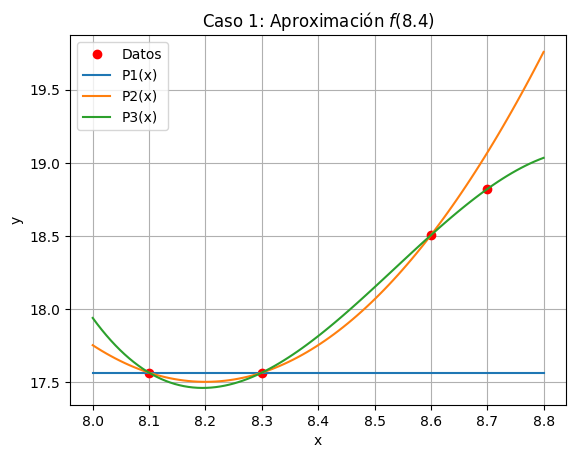

In [28]:
# Graficar el polinomio interpolador y los datos para el caso 1
x_plot = np.linspace(8.0, 8.8, 100)

plt.figure()
plt.title("Caso 1: Aproximación $f(8.4)$")
plt.plot(x_data1, y_data1, 'ro', label='Datos')
for orden in range(1, 4):
    polinomio = interpolador_newton(x_data1, matriz_diferencias1, orden)
    y_plot = [polinomio.subs('x', x) for x in x_plot]
    plt.plot(x_plot, y_plot, label=f"P{orden}(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

In [29]:
# Caso 2 datos
x_data2 = [0.6, 0.7, 0.8, 1.0]
y_data2 = [-0.17694460, 0.01375227, 0.22363362, 0.658009197]

matriz_diferencias2 = diferencias_divididas(x_data2, y_data2)

x_eval2 = 0.9

# Caso 2
display(Latex("Aproximacion 2: $f(0.9)$:"))

# Orden 1
orden = 1
polinomio = interpolador_newton(x_data2, matriz_diferencias2, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval2)
display(Math(f"f({x_eval2}) \\approx {resultado:.5f}"))
print("")

# Orden 2
orden = 2
polinomio = interpolador_newton(x_data2, matriz_diferencias2, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval2)
display(Math(f"f({x_eval2}) \\approx {resultado:.5f}"))
print("")

# Orden 3
orden = 3
polinomio = interpolador_newton(x_data2, matriz_diferencias2, orden)
polinomio_latex = latex(polinomio)
display(Math(f"P{orden}(x) = {polinomio_latex}"))
resultado = polinomio.subs("x", x_eval2)
display(Math(f"f({x_eval2}) \\approx {resultado:.5f}"))


<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

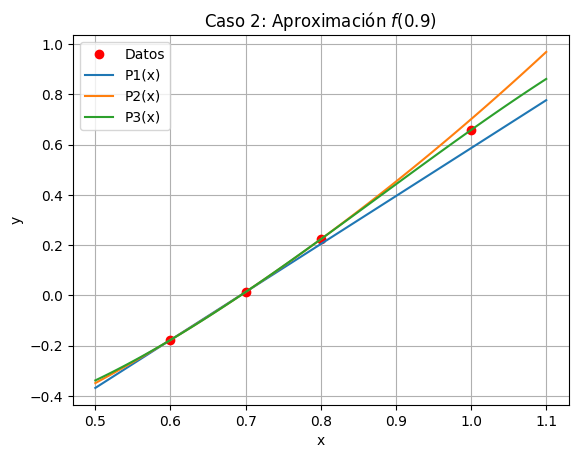

In [30]:
# Graficar el polinomio interpolador y los datos para el caso 2
x_plot = np.linspace(0.5, 1.1, 100)

plt.figure()
plt.title("Caso 2: Aproximación $f(0.9)$")
plt.plot(x_data2, y_data2, 'ro', label='Datos')
for orden in range(1, 4):
    polinomio = interpolador_newton(x_data2, matriz_diferencias2, orden)
    y_plot = [polinomio.subs('x', x) for x in x_plot]
    plt.plot(x_plot, y_plot, label=f"P{orden}(x)")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## Ejercicio 2


*   Construya el polinomio interpolador de cuarto grado para los puntos no igualmente espaciados que se muestran en la tabla a continuación

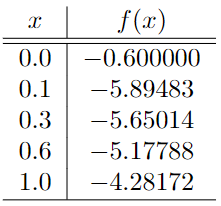
*   Añada el punto $f(1.1)=-3.99583$ y construya el polinomio interpolador de quinto orden.

In [31]:
def interpolador_lagrange(x_values, y_values):
    # Define la variable simbólica 'x' para construir los polinomios
    x = sp.Symbol('x')
    # Obtiene la cantidad de puntos (x, y) proporcionados
    n = len(x_values)
    # Inicializa el polinomio interpolador a 0
    polynomial = 0
    # Bucle sobre todos los índices de los puntos de datos
    for i in range(n):
        # Inicializa el i-ésimo polinomio de Lagrange a 1
        L_i = 1
        # Bucle sobre todos los índices de los puntos de datos
        for j in range(n):
            # Verifica si los índices i y j son diferentes
            if i != j:
                # Multiplica y acumula el término (x - x_values[j]) / (x_values[i] - x_values[j]) al i-ésimo polinomio de Lagrange
                L_i *= (x - x_values[j]) / (x_values[i] - x_values[j])
        # Multiplica el valor y_values[i] por el i-ésimo polinomio de Lagrange y lo acumula en el polinomio interpolador
        polynomial += y_values[i] * L_i
    # Simplifica el polinomio resultante y lo retorna
    return sp.simplify(polynomial)

In [32]:
# Puntos dados
x_values = [0.0, 0.1, 0.3, 0.6, 1.0]
y_values = [-0.6, -5.89483, -5.65014, -5.17788, -4.28172]

# Polinomio interpolador de cuarto grado
P4 = interpolador_lagrange(x_values, y_values)

# Mostrar P4
print("Polinomio interpolador de cuarto grado: ")
display(Math(f"P4(x) = {latex(P4)}"))

# Añadir el punto f(1.1) = -3.99583
x_values.append(1.1)
y_values.append(-3.99583)

# Polinomio interpolador de quinto grado
P5 = interpolador_lagrange(x_values, y_values)

# Mostrar P5
print("Construyamos el polinomio interpolador de quinto orden añadiendo f(1.1) = -3.99583: ")
display(Math(f"P5(x) = {latex(P5)}"))

Polinomio interpolador de cuarto grado: 


<IPython.core.display.Math object>

Construyamos el polinomio interpolador de quinto orden añadiendo f(1.1) = -3.99583: 


<IPython.core.display.Math object>

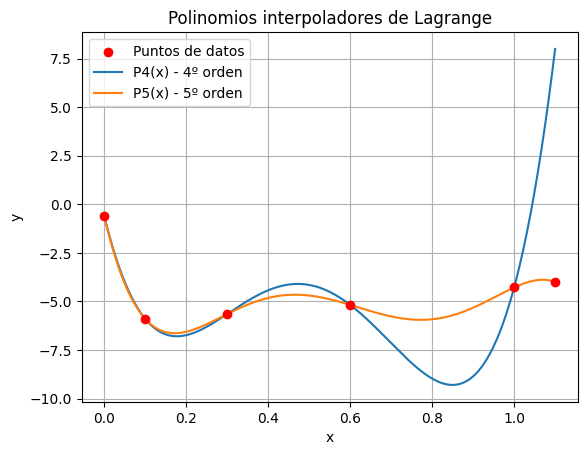

In [33]:
# Convertir los polinomios a funciones numéricas
P4_func = sp.lambdify("x", P4, 'numpy')
P5_func = sp.lambdify("x", P5, 'numpy')

# Valores de x para graficar los polinomios interpoladores
x_plot = np.linspace(0, 1.1, 500)

# Graficar los puntos de datos
plt.scatter(x_values, y_values, label='Puntos de datos', color='red', zorder=3)

# Graficar el polinomio interpolador de cuarto grado
plt.plot(x_plot, P4_func(x_plot), label='P4(x) - 4º orden')

# Graficar el polinomio interpolador de quinto grado
plt.plot(x_plot, P5_func(x_plot), label='P5(x) - 5º orden')

# Ajustes de la gráfica
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polinomios interpoladores de Lagrange')
plt.grid(True)
plt.show()

## Ejercicio 3
Haciendo uso de la fórmula del trapecio, regla de Simpson y regla de Simpson 3/8 evalue las siguientes integrales ¿qué puede concluir?

*   $\int_{-0.25}^{0.25}(\cos x)^{2} d x$
*   $\int_{-0.5}^{0} x \ln (x+1) d x$
*   $\int_{0.75}^{1.3}\left((\sin x)^{2}-2 x \sin x+1\right) d x$
*   $\int_{e}^{e+1} \frac{1}{x \ln x} d x$


In [34]:
x = sp.symbols('x')

# Funciones a integrar
f1 = sp.cos(x)**2
f2 = x * sp.log(x + 1)
f3 = sp.sin(x)**2 - 2 * x * sp.sin(x) + 1
f4 = 1 / (x * sp.log(x))

functions = [f1, f2, f3, f4]

# Límites de integración
limits = [
    (-0.25, 0.25),
    (-0.5, 0),
    (0.75, 1.3),
    (np.e, np.e + 1)
]

In [35]:
# Regla del trapecio
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = 0.5 * (f.subs(x, a) + f.subs(x, b))  # Inicializa el resultado sumando los valores de la función en los límites a y b, multiplicado por 0.5
    for i in range(1, n):  # Itera sobre los puntos intermedios del intervalo, excluyendo a y b
        result += f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual al resultado
    result *= h  # Multiplica el resultado acumulado por el tamaño del paso (h)
    return result

# Regla de Simpson 1/3
def simpson_rule(f, a, b, n):
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = f.subs(x, a) + f.subs(x, b)  # Inicializa el resultado sumando los valores de la función en los límites a y b
    for i in range(1, n, 2):  # Itera sobre los puntos intermedios impares del intervalo, excluyendo a y b
        result += 4 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 4, al resultado
    for i in range(2, n-1, 2):  # Itera sobre los puntos intermedios pares del intervalo, excluyendo a y b
        result += 2 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 2, al resultado
    result *= h / 3  # Multiplica el resultado acumulado por el tamaño del paso (h) dividido por 3
    return result 

# Regla de Simpson 3/8
def simpson_3_8_rule(f, a, b, n):
    if n % 3 != 0:  # Verifica si n es múltiplo de 3, ya que la regla de Simpson 3/8 requiere que lo sea
        return "n debe ser multiplo de 3"
    h = (b - a) / n  # Calcula el tamaño del paso (h) dividiendo el intervalo en n partes iguales
    result = f.subs(x, a) + f.subs(x, b)  # Inicializa el resultado sumando los valores de la función en los límites a y b
    for i in range(1, n, 3):  # Itera sobre los puntos intermedios del intervalo con un paso de 3, excluyendo a y b
        result += 3 * (f.subs(x, a + i * h) + f.subs(x, a + (i + 1) * h))  # Suma el valor de la función en los puntos actuales (i e i+1), multiplicado por 3, al resultado
    for i in range(3, n-2, 3):  # Itera sobre los puntos intermedios del intervalo con un paso de 3, comenzando desde el tercer punto y excluyendo a, b y el último punto antes de b
        result += 2 * f.subs(x, a + i * h)  # Suma el valor de la función en el punto actual, multiplicado por 2, al resultado
    result *= 3 * h / 8  # Multiplica el resultado acumulado por el tamaño del paso (h) multiplicado por 3 y dividido por 8
    return result

In [36]:
n = 12

for i, (f, (a, b)) in enumerate(zip(functions, limits),1):
    
    integral_repr = sp.latex(sp.Integral(f, (x, a, b)))
    trapezoidal = trapezoidal_rule(f, a, b, n)
    simpson = simpson_rule(f, a, b, n)
    simpson_3_8 = simpson_3_8_rule(f, a, b, n)
    
    display(Math(f"\\text{{Integral {i}: }} {integral_repr}"))
    print(f"  Trapezoidal: {trapezoidal}")
    print(f"  Simpson 13: {simpson}")
    print(f"  Simpson 38: {simpson_3_8}")
    print()

<IPython.core.display.Math object>

  Trapezoidal: 0.489574030576162
  Simpson 13: 0.489712833578692
  Simpson 38: 0.489712914044185



<IPython.core.display.Math object>

  Trapezoidal: 0.0528146939038572
  Simpson 13: 0.0525700891271133
  Simpson 38: 0.0525704353559308



<IPython.core.display.Math object>

  Trapezoidal: -0.0204895172790647
  Simpson 13: -0.0203767170369430
  Simpson 38: -0.0203766182194500



<IPython.core.display.Math object>

  Trapezoidal: 0.272614339296861
  Simpson 13: 0.272514025718998
  Simpson 38: 0.272514205186992



#### Conclusion
Al comparar la regla del trapecio, la regla de Simpson y la regla de Simpson 3/8, es posible identificar qué método es más preciso en función de la función y el intervalo de integración, y elegir el método más adecuado para resolver problemas de integración numérica. en general la regla de Simpson y 3/8 de Simpson es mas precisa que el de trapecio, pero el de 1/3 de Simpson es mas precisa al utilizar "n" que sean pares, y el 3/8 cuando "n" es multiplo de 3, es por esto que utilizamos n = 12 para realizar las comparaciones ya que esta cumple con los requisitos para los 2 metodos de Simpson y asi poder comparar bien los resultados de acauerdo a los 3 metodos.